In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [2]:
# Runs shell command to list all the electron psd files to the
# master file "psdlist.txt"

os.chdir('run1724/Degeling_7th/')
os.system('ls 2*_e.psd > psdlist.txt')

0

In [3]:
# Stores all of the psd files into a python list.
psd_filenames = []
with open('psdlist.txt','r') as reader:
    for line in reader:
        psd_filenames.append( line.split()[0] )

nFiles = len( psd_filenames )

In [4]:
# Opens the first psd file to get the overall 
with open( psd_filenames[0], 'r' ) as reader:
    
    # Reads the header line to get variable lengths
    line = reader.readline()
    fields = line.split()

    rc0    = float( fields[0] )
    nLat0  = int( fields[1] )
    nMLT0  = int( fields[2] )
    nMu0   = int( fields[3] )
    nK0    = int( fields[4] )
    nTime0 = int( fields[5] )

    # Reads in the K-variable array
    xK0 = []
    while( len( xK0 ) < nK0 ):

        xK_line = reader.readline()
        xK_fields = xK_line.split()

        for xK_item in range( len( xK_fields ) ):
            xK0.append( float( xK_fields[ xK_item ] ) )
    xK0 = np.array(xK0)

    # Reads in the mu-variable array
    xmm0 = []
    while ( len( xmm0 ) < nMu0 ):

        xmm_line = reader.readline()
        xmm_fields = xmm_line.split()

        for xmm_item in range( len( xmm_fields ) ):
            xmm0.append( float( xmm_fields[ xmm_item ] ) )
    xmm0 = np.array(xmm0)


    lat0 = []
    while ( len( lat0 ) < nLat0 ):

        lat_line = reader.readline()
        lat_fields = lat_line.split()

        for lat_item in range( len( lat_fields ) ):
            lat0.append( float( lat_fields[ lat_item ] ) )
    lat0 = np.array(lat0)

In [5]:
# Create the empty arrays to begin reading all the data from files
psd = np.zeros( nFiles * nLat0 * (nMLT0 + 1) * nMu0 ).reshape( nFiles, nLat0, nMLT0 + 1, nMu0 )
roa = np.zeros( nFiles * nLat0 * (nMLT0 + 1 ) ).reshape( nFiles, nLat0, nMLT0 + 1 )
mltoa = np.zeros( nFiles * nLat0 * (nMLT0 + 1 ) ).reshape( nFiles, nLat0, nMLT0 + 1 )
houra = np.zeros( nFiles )


#print( "psd.size: ", psd.size )
#print( "psd.shape: ", psd.shape )

In [6]:
print("Getting PSD:")
range(nFiles)

Getting PSD:


range(0, 361)

In [7]:
#for iFile in range( 1 ):
for iFile in range( nFiles ):
#    print("iFile: ", iFile)
    print("psd_filenames[iFile]: ", psd_filenames[iFile])
    with open(psd_filenames[iFile], 'r') as reader:
        line = reader.readline()
        fields = line.split()

        rc    = float( fields[0] )
        nLat  = int( fields[1] )
        nMLT  = int( fields[2] )
        nMu   = int( fields[3] )
        nK    = int( fields[4] )
        nTime = int( fields[5] )

        # Reads in the K-variable array
        xK = []
        while( len( xK ) < nK ):

            xK_line = reader.readline()
            xK_fields = xK_line.split()

            for xK_item in range( len( xK_fields ) ):
                xK.append( float( xK_fields[ xK_item ] ) )
        xK = np.array(xK)

        # Reads in the mu-variable array
        xmm = []
        while ( len( xmm ) < nMu ):

            xmm_line = reader.readline()
            xmm_fields = xmm_line.split()

            for xmm_item in range( len( xmm_fields ) ):
                xmm.append( float( xmm_fields[ xmm_item ] ) )
        xmm = np.array(xmm)

        lat = []
        while ( len( lat ) < nLat ):

            lat_line = reader.readline()
            lat_fields = lat_line.split()

            for lat_item in range( len( lat_fields ) ):
                lat.append( float( lat_fields[ lat_item ] ) )
        lat = np.array(lat)
        
        ro = np.zeros( nLat * ( nMLT + 1 ) ).reshape( nLat, nMLT + 1 )
        mlto = ro  	
        plspsd = ro


        line = reader.readline()
        fields = line.split()
        houra[iFile] = float( fields[0] )
        
        for iLat in range( nLat ):
            for iMLT in range( nMLT ):
                line = reader.readline()
                fields = line.split()
                #print(fields)
                mltoa[ iFile, iLat, iMLT ] = float(fields[1])
                roa[ iFile, iLat, iMLT ]   = float(fields[2])
                #input("pause")
                
                psdy = []
                while ( len( psdy ) < nMu ):
                    line = reader.readline()
                    fields = line.split()
                    psdy.append( float( fields[ 0 ] ) )
                    # end Mu while Loop
                    
                #print(psdy)
                #input("pause")
                psd[ iFile, iLat, iMLT, : ] = np.array(psdy)
            #END MLT for Loop
        #END Lat for Loop
        
        mltoa[ iFile, :, : ] = mltoa[ iFile, :, : ] * np.pi / 12.0
        roa[ iFile, :, nMLT ] = roa[ iFile, :, 0 ]
        mltoa[ iFile, :, nMLT ] = mltoa[ iFile, :, 0 ]
        psd[ iFile, :, nMLT, : ] = psd[ iFile, :, 0, : ]
    #END reader with loop
#END iFile for loop

        

psd_filenames[iFile]:  20020202_010100_e.psd
psd_filenames[iFile]:  20020202_010200_e.psd
psd_filenames[iFile]:  20020202_010300_e.psd
psd_filenames[iFile]:  20020202_010400_e.psd
psd_filenames[iFile]:  20020202_010500_e.psd
psd_filenames[iFile]:  20020202_010600_e.psd
psd_filenames[iFile]:  20020202_010700_e.psd
psd_filenames[iFile]:  20020202_010800_e.psd
psd_filenames[iFile]:  20020202_010900_e.psd
psd_filenames[iFile]:  20020202_011000_e.psd
psd_filenames[iFile]:  20020202_011100_e.psd
psd_filenames[iFile]:  20020202_011200_e.psd
psd_filenames[iFile]:  20020202_011300_e.psd
psd_filenames[iFile]:  20020202_011400_e.psd
psd_filenames[iFile]:  20020202_011500_e.psd
psd_filenames[iFile]:  20020202_011600_e.psd
psd_filenames[iFile]:  20020202_011700_e.psd
psd_filenames[iFile]:  20020202_011800_e.psd
psd_filenames[iFile]:  20020202_011900_e.psd
psd_filenames[iFile]:  20020202_012000_e.psd
psd_filenames[iFile]:  20020202_012100_e.psd
psd_filenames[iFile]:  20020202_012200_e.psd
psd_filena

psd_filenames[iFile]:  20020202_040500_e.psd
psd_filenames[iFile]:  20020202_040600_e.psd
psd_filenames[iFile]:  20020202_040700_e.psd
psd_filenames[iFile]:  20020202_040800_e.psd
psd_filenames[iFile]:  20020202_040900_e.psd
psd_filenames[iFile]:  20020202_041000_e.psd
psd_filenames[iFile]:  20020202_041100_e.psd
psd_filenames[iFile]:  20020202_041200_e.psd
psd_filenames[iFile]:  20020202_041300_e.psd
psd_filenames[iFile]:  20020202_041400_e.psd
psd_filenames[iFile]:  20020202_041500_e.psd
psd_filenames[iFile]:  20020202_041600_e.psd
psd_filenames[iFile]:  20020202_041700_e.psd
psd_filenames[iFile]:  20020202_041800_e.psd
psd_filenames[iFile]:  20020202_041900_e.psd
psd_filenames[iFile]:  20020202_042000_e.psd
psd_filenames[iFile]:  20020202_042100_e.psd
psd_filenames[iFile]:  20020202_042200_e.psd
psd_filenames[iFile]:  20020202_042300_e.psd
psd_filenames[iFile]:  20020202_042400_e.psd
psd_filenames[iFile]:  20020202_042500_e.psd
psd_filenames[iFile]:  20020202_042600_e.psd
psd_filena

75


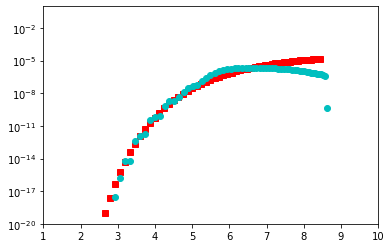

In [9]:
plt.plot( roa[ 000, :, 0 ], psd[ 000,:, 0, 30 ], 'rs' )
plt.plot( roa[ 270, :, 0 ], psd[ 270,:, 0, 30 ], 'co' )
plt.axis([1,10,1e-20,1e0])
plt.yscale('log')

print(len(roa[0,:,0]))

In [10]:
file = open('PSD_reduced_7th.pysav','wb')
np.save(file,roa)
np.save(file,mltoa)
np.save(file,psd)
np.save(file,houra)
np.save(file,xK0)
np.save(file,xmm0)
np.save(file,lat0)
file.close

<function BufferedWriter.close>

In [11]:
print(psd.shape)

(361, 75, 49, 48)


In [15]:
file = open('PSD_reduced_7th.pysav','rb')
roa_7th = np.load(file)
mltoa_7th = np.load(file)
psd_7th = np.load(file)
houra_7th = np.load(file)
xK0_7th = np.load(file)
xmm0_7th = np.load(file)
lat0_7th = np.load(file)
file.close

<function BufferedReader.close>

75


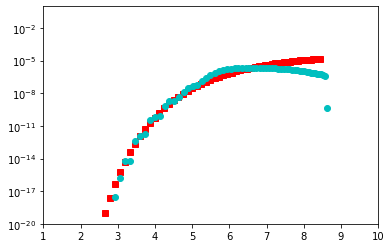

In [16]:
plt.plot( roa_7th[ 000, :, 0 ], psd_7th[ 000,:, 0, 30 ], 'rs' )
plt.plot( roa_7th[ 270, :, 0 ], psd_7th[ 270,:, 0, 30 ], 'co' )
plt.axis([1,10,1e-20,1e0])
plt.yscale('log')

print(len(roa_7th[0,:,0]))